# Find ways to cycle through the files

In [1]:
import pandas as pd

In [2]:
# get all fingerprint labels
fp_labels = ['Morgan2noFeat', 'Morgan3noFeat', 'Morgan2Feat', 'Morgan3Feat']

# get all similarity labels
sim_labels = ['Tanimoto', 'Dice', 'TverskyA', 'TverskyB']
file_num = 0
#loop through the fingerprint labels
for fp in fp_labels:
    #loop through the similarity labels
    for sim in sim_labels:
        
        #read the pandas dataframe
        dataset = pd.read_pickle ('datasub_val_result_{}_{}.pkl'.format(fp,sim))
        file_num += 1
        print ('\n**********')
        print ('New dataframe read!')
        print ('File name is: datasub_val_result_{}_{}.pkl'.format(fp,sim))
        print ('File number is: {}'.format (file_num))
        dataset.info()


**********
New dataframe read!
File name is: datasub_val_result_Morgan2noFeat_Tanimoto.pkl
File number is: 1
<class 'pandas.core.frame.DataFrame'>
Int64Index: 43525 entries, 30 to 447752
Data columns (total 13 columns):
Reaction SMILES                                       43525 non-null object
reactionID                                            43525 non-null int64
react_smiles                                          43525 non-null object
rxn_smiles                                            43525 non-null object
template                                              43525 non-null object
Template Verification (True/False)                    43525 non-null bool
canonical_rxn_smiles                                  43525 non-null object
dataset                                               43525 non-null object
Reaction Partner (s)                                  43525 non-null object
Rank                                                  43525 non-null int64
Reaction               


**********
New dataframe read!
File name is: datasub_val_result_Morgan3noFeat_TverskyB.pkl
File number is: 8
<class 'pandas.core.frame.DataFrame'>
Int64Index: 43525 entries, 30 to 447752
Data columns (total 13 columns):
Reaction SMILES                                       43525 non-null object
reactionID                                            43525 non-null int64
react_smiles                                          43525 non-null object
rxn_smiles                                            43525 non-null object
template                                              43525 non-null object
Template Verification (True/False)                    43525 non-null bool
canonical_rxn_smiles                                  43525 non-null object
dataset                                               43525 non-null object
Reaction Partner (s)                                  43525 non-null object
Rank                                                  43525 non-null int64
Reaction               

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43525 entries, 30 to 447752
Data columns (total 13 columns):
Reaction SMILES                                       43525 non-null object
reactionID                                            43525 non-null int64
react_smiles                                          43525 non-null object
rxn_smiles                                            43525 non-null object
template                                              43525 non-null object
Template Verification (True/False)                    43525 non-null bool
canonical_rxn_smiles                                  43525 non-null object
dataset                                               43525 non-null object
Reaction Partner (s)                                  43525 non-null object
Rank                                                  43525 non-null int64
Reaction                                              43525 non-null object
Similarity (proposed product vs recorded product)     435

# Top-K accuracy analysis

In [3]:
def ranks_to_acc(found_at_rank, fid=None):
    def fprint(txt):
        #print(txt)
        if fid is not None:
            fid.write(txt + '\n')
            
    tot = float(len(found_at_rank))
    fprint('{:>8} \t {:>8}'.format('top-n', 'accuracy'))
    accs = []
    for n in [1, 3, 5, 10, 20, 50, 100]:
        accs.append(sum([r <= n for r in found_at_rank]) / tot)
        fprint('{:>8} \t {:>8}'.format(n, accs[-1]))
    return accs

In [4]:
import os

In [5]:
# get all fingerprint labels
fp_labels = ['Morgan2noFeat', 'Morgan3noFeat', 'Morgan2Feat', 'Morgan3Feat']

# get all similarity labels
sim_labels = ['Tanimoto', 'Dice', 'TverskyA', 'TverskyB']

# loop through the fingerprint labels
for fp in fp_labels:
    # loop through the similarity labels
    for sim in sim_labels:
        
        # read the pandas dataframe
        dataset = pd.read_pickle ('datasub_val_result_{}_{}.pkl'.format(fp,sim))
        
        # get the rank to a list
        found_at_rank = dataset['Rank'].to_list()
        
        # do the top-k accuracy analysis
        accs = ranks_to_acc(found_at_rank)
        
        # save to global results file
        if not os.path.isfile('results.txt'):
            with open('results.txt', 'w') as fid2:
                fid2.write('\t'.join(['{:>16}'.format(x) for x in [
                'dataset', 'getfp_label', 'similarity_label',
                'top-1 acc', 'top-3 acc', 'top-5 acc', 'top-10 acc',
                'top-20 acc','top-50 acc','top-100 acc']]) + '\n')
        
        with open ('results.txt', 'a') as fid2:
            fid2.write('\t'.join(['{:>16}'.format(x) for x in [
                                    'val', '{}'.format(fp), '{}'.format(sim),
                                ] + accs]) + '\n')

# Read the validation runs in result.txt file

In [6]:
import pandas as pd
results = pd.read_csv('results.txt', sep = '\t')

In [7]:
results

,dataset,getfp_label,similarity_label,top-1 acc,top-3 acc,top-5 acc,top-10 acc,top-20 acc,top-50 acc,top-100 acc
0,val,Morgan2noFeat,Tanimoto,0.246686,0.393383,0.472441,0.596554,0.719678,0.847352,0.872694
1,val,Morgan2noFeat,Dice,0.247122,0.393957,0.473429,0.597335,0.720551,0.847214,0.872694
2,val,Morgan2noFeat,TverskyA,0.247099,0.394647,0.470764,0.590626,0.711040,0.832487,0.856772
3,val,Morgan2noFeat,TverskyB,0.242780,0.390373,0.466628,0.593682,0.722137,0.856956,0.884687
4,val,Morgan3noFeat,Tanimoto,0.242137,0.388880,0.467478,0.587915,0.709569,0.838576,0.864698
5,val,Morgan3noFeat,Dice,0.242918,0.390167,0.468903,0.589477,0.710442,0.838484,0.864698
6,val,Morgan3noFeat,TverskyA,0.243377,0.388926,0.464469,0.582355,0.702079,0.825503,0.849512
7,val,Morgan3noFeat,TverskyB,0.239518,0.384446,0.463642,0.586789,0.711361,0.847605,0.875244
8,val,Morgan2Feat,Tanimoto,0.256060,0.406732,0.487743,0.612384,0.733280,0.863021,0.889971
9,val,Morgan2Feat,Dice,0.256175,0.407030,0.488363,0.613073,0.733946,0.863067,0.889971


In [8]:
results.columns = [txt.strip() for txt in results.columns]

In [9]:
for fieldstrip in ['dataset', 'getfp_label', 'similarity_label']:
    results[fieldstrip] = [txt.strip() for txt in results[fieldstrip]]

In [10]:
val_results = results.loc[results['dataset'] == 'val']

In [11]:
val_results

,dataset,getfp_label,similarity_label,top-1 acc,top-3 acc,top-5 acc,top-10 acc,top-20 acc,top-50 acc,top-100 acc
0,val,Morgan2noFeat,Tanimoto,0.246686,0.393383,0.472441,0.596554,0.719678,0.847352,0.872694
1,val,Morgan2noFeat,Dice,0.247122,0.393957,0.473429,0.597335,0.720551,0.847214,0.872694
2,val,Morgan2noFeat,TverskyA,0.247099,0.394647,0.470764,0.590626,0.711040,0.832487,0.856772
3,val,Morgan2noFeat,TverskyB,0.242780,0.390373,0.466628,0.593682,0.722137,0.856956,0.884687
4,val,Morgan3noFeat,Tanimoto,0.242137,0.388880,0.467478,0.587915,0.709569,0.838576,0.864698
5,val,Morgan3noFeat,Dice,0.242918,0.390167,0.468903,0.589477,0.710442,0.838484,0.864698
6,val,Morgan3noFeat,TverskyA,0.243377,0.388926,0.464469,0.582355,0.702079,0.825503,0.849512
7,val,Morgan3noFeat,TverskyB,0.239518,0.384446,0.463642,0.586789,0.711361,0.847605,0.875244
8,val,Morgan2Feat,Tanimoto,0.256060,0.406732,0.487743,0.612384,0.733280,0.863021,0.889971
9,val,Morgan2Feat,Dice,0.256175,0.407030,0.488363,0.613073,0.733946,0.863067,0.889971


In [12]:
import numpy as np

In [13]:
val_results

,dataset,getfp_label,similarity_label,top-1 acc,top-3 acc,top-5 acc,top-10 acc,top-20 acc,top-50 acc,top-100 acc
0,val,Morgan2noFeat,Tanimoto,0.246686,0.393383,0.472441,0.596554,0.719678,0.847352,0.872694
1,val,Morgan2noFeat,Dice,0.247122,0.393957,0.473429,0.597335,0.720551,0.847214,0.872694
2,val,Morgan2noFeat,TverskyA,0.247099,0.394647,0.470764,0.590626,0.711040,0.832487,0.856772
3,val,Morgan2noFeat,TverskyB,0.242780,0.390373,0.466628,0.593682,0.722137,0.856956,0.884687
4,val,Morgan3noFeat,Tanimoto,0.242137,0.388880,0.467478,0.587915,0.709569,0.838576,0.864698
5,val,Morgan3noFeat,Dice,0.242918,0.390167,0.468903,0.589477,0.710442,0.838484,0.864698
6,val,Morgan3noFeat,TverskyA,0.243377,0.388926,0.464469,0.582355,0.702079,0.825503,0.849512
7,val,Morgan3noFeat,TverskyB,0.239518,0.384446,0.463642,0.586789,0.711361,0.847605,0.875244
8,val,Morgan2Feat,Tanimoto,0.256060,0.406732,0.487743,0.612384,0.733280,0.863021,0.889971
9,val,Morgan2Feat,Dice,0.256175,0.407030,0.488363,0.613073,0.733946,0.863067,0.889971


In [14]:
val_performance = np.zeros((
    len(np.unique(val_results['similarity_label'])),
    len(np.unique(val_results['getfp_label'])),
    6,        
))
ns = [1, 3, 5, 10, 20, 50]
for i, similarity_label in enumerate(np.unique(val_results['similarity_label'])):
    for j, getfp_label in enumerate(np.unique(val_results['getfp_label'])):
        this_data = val_results.loc[val_results['similarity_label'] == similarity_label].\
             loc[val_results['getfp_label'] == getfp_label]
        for k, n in enumerate(ns):
            acc_label = 'top-{} acc'.format(n)
            accs = np.array(this_data[acc_label])
            overall_acc = sum(accs)
            val_performance[i, j, k] = overall_acc

In [15]:
val_performance

array([[[0.25617461, 0.40703044, 0.48836301, 0.61307295, 0.73394601,
         0.8630672 ],
        [0.24712234, 0.3939575 , 0.47342906, 0.59733487, 0.72055141,
         0.84721424],
        [0.25422171, 0.40328547, 0.4857668 , 0.60700747, 0.72861574,
         0.85102814],
        [0.24291786, 0.39016657, 0.46890293, 0.58947731, 0.71044227,
         0.83848363]],

       [[0.25605974, 0.40673176, 0.48774268, 0.61238369, 0.73327972,
         0.86302125],
        [0.24668581, 0.39338311, 0.47244113, 0.5965537 , 0.71967835,
         0.8473521 ],
        [0.2534865 , 0.40241241, 0.48473291, 0.60636416, 0.72797243,
         0.85084434],
        [0.2421367 , 0.38887995, 0.46747846, 0.58791499, 0.70956921,
         0.83857553]],

       [[0.25863297, 0.40698449, 0.48788053, 0.60886847, 0.72866169,
         0.85231476],
        [0.24709937, 0.39464675, 0.47076393, 0.59062608, 0.71103963,
         0.83248708],
        [0.25364733, 0.40392878, 0.48454911, 0.60250431, 0.72098794,
         0.839839

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [17]:
ns

[1, 3, 5, 10, 20, 50]

/home/karthiksankar2/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


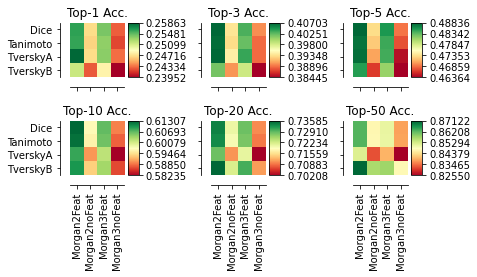

In [18]:
fig, axes = plt.subplots(2,3)
axes = axes.flatten()
for k, n in enumerate(ns):
    ax = axes[k]
    im = ax.imshow(val_performance[:,:,k], cmap='RdYlGn', interpolation='nearest')
    ax.set_xticklabels(['', 0,10,20,30,40])
    ax.set_title('Top-{} Acc.'.format(n))
    #cbar = fig.colorbar(im, ax=ax, ticks=np.arange(0.0, 1.02, 0.002))
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="20%", pad=0.05)
    ax_min = np.amin (val_performance[:,:,k])
    ax_max = np.amax (val_performance[:,:,k])
    step = (ax_max-ax_min)/5
    plt.colorbar(im, cax=cax,ticks=np.arange(ax_min,ax_max+step,step))
    
    # from http://matplotlib.org/examples/ticks_and_spines/spines_demo_dropped.html
    # Move left and bottom spines outward by 10 points
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    ax.xaxis.set_ticks(range(val_performance.shape[1]))
    if k >= 3:
        ax.xaxis.set_ticklabels(np.unique(val_results['getfp_label']), rotation='vertical')
    else:
        ax.xaxis.set_ticklabels([])
        
    ax.yaxis.set_ticks(range(val_performance.shape[0]))
    if k % 3 == 0:
        ax.yaxis.set_ticklabels(np.unique(val_results['similarity_label']))
    else:
        ax.yaxis.set_ticklabels([])
fig.set_size_inches(17.1/2.54, 4)
plt.tight_layout()
